### This notebook focuses on the in-depth evaluation of XGBoost and LightGBM models. We will perform cross-validation, analyze residuals, and check for overfitting.


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [23]:
# Load the feature-engineered dataset
feature_engineered_data_path = "../data/processed/feature_engineered_energy_data.csv"
df = pd.read_csv(feature_engineered_data_path)

In [24]:
# Define features (X) and target (y)
X = df.drop(columns=['TotalRenewableEnergy', 'Country'])
y = df['TotalRenewableEnergy']

In [25]:
# Load the best saved model
model_save_path = "../data/models/trained_models.pkl"
best_model = joblib.load(model_save_path)

In [26]:
# Cross-validation to assess model robustness
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')

In [27]:
# Display cross-validation scores
print("Cross-validation scores (R2):")
print(cv_scores)
print(f"Mean R2 score: {np.mean(cv_scores):.2f}")

Cross-validation scores (R2):
[0.99634544 0.99220217 0.9976512  0.99460758 0.99398008]
Mean R2 score: 0.99


In [28]:
# Residual analysis
y_pred = best_model.predict(X)
residuals = y - y_pred

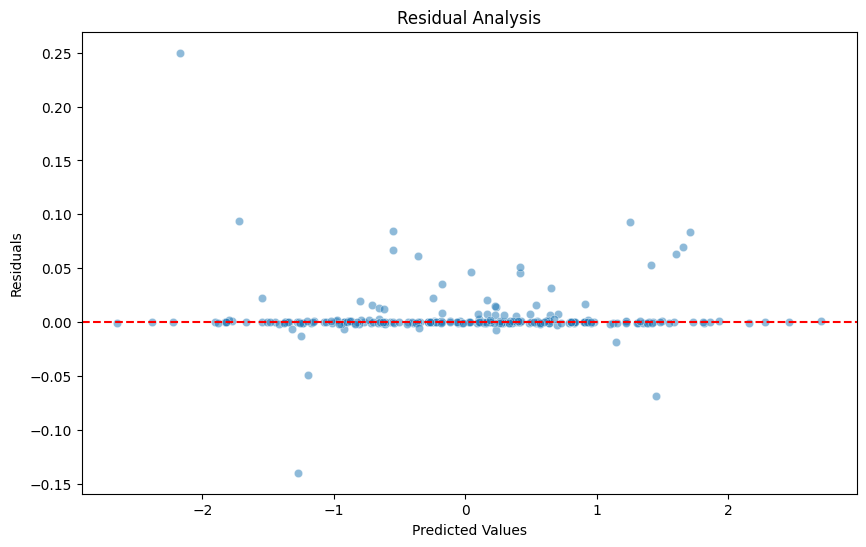

In [29]:
# Visualize residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

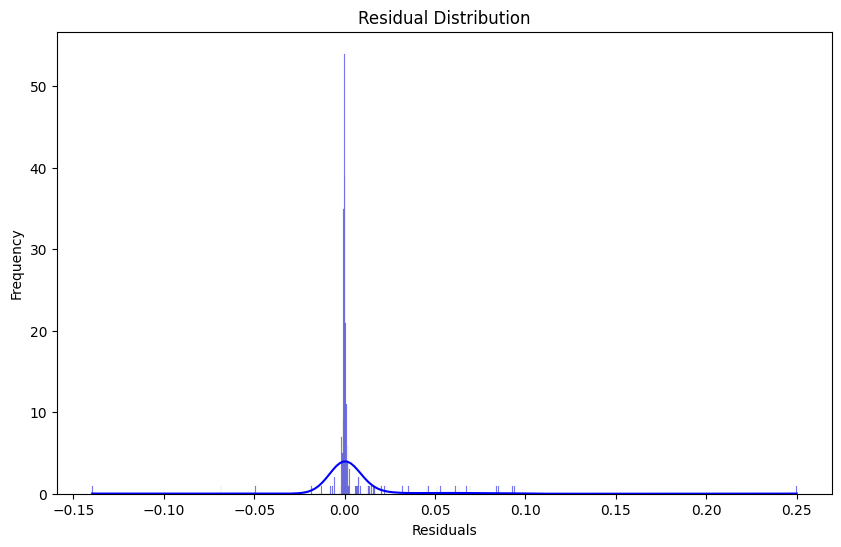

In [30]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [31]:
# Check for overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Predictions on training set
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

In [33]:
# Predictions on test set
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

In [34]:
# Display R2 scores
print(f"R2 on training set: {train_r2:.2f}")
print(f"R2 on test set: {test_r2:.2f}")

R2 on training set: 1.00
R2 on test set: 1.00
